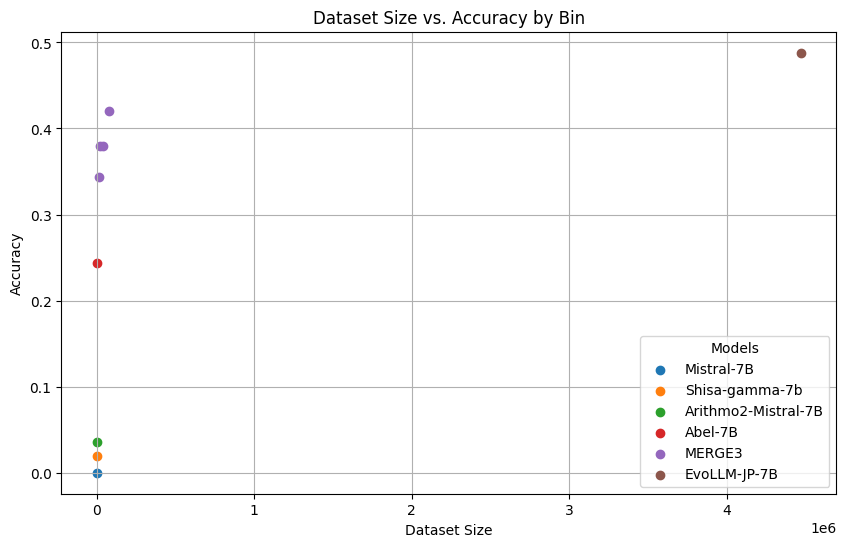

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data in CSV format
data = {
    "bin": [
        "Mistral-7B",
        "Shisa-gamma-7b",
        "Arithmo2-Mistral-7B",
        "Abel-7B",
        "MERGE3",
        "MERGE3",
        "MERGE3",
        "MERGE3",
        "EvoLLM-JP-7B"
    ],
    "accuracy": [0.0, 0.02, 0.036, 0.244, 0.344, 0.38, 0.38, 0.42, 0.488],
    "dataset_size": [0, 0, 0, 0, 20, 30, 50, 100, 1069],
    "flops": [0, 0, 0, 0, 15645, 23467, 39112, 78225, 4470000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))
for bin_label in df['bin'].unique():
    subset = df[df['bin'] == bin_label]
    plt.scatter(subset['dataset_size'], subset['accuracy'], label=bin_label)

# Add labels and legend
plt.ylabel("Accuracy")
plt.xlabel("Dataset Size")
plt.title("Dataset Size vs. Accuracy by Bin")
plt.legend(title="Models")
plt.grid(True)
plt.show()


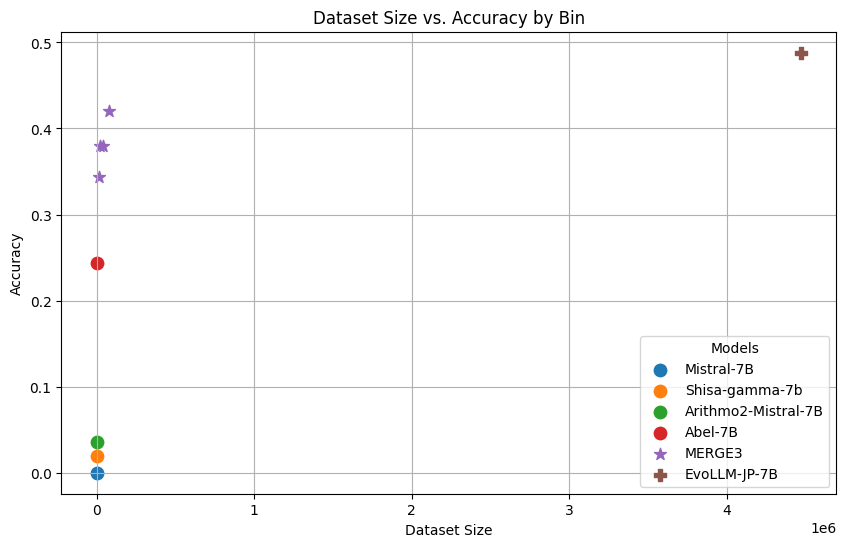

In [2]:

# Define marker styles
markers = {
    "Mistral-7B": "o",
    "Shisa-gamma-7b": "o",
    "Arithmo2-Mistral-7B": "o",
    "Abel-7B": "o",
    "MERGE3": "*",
    "EvoLLM-JP-7B": "P"
}

# Plot the data with different markers
plt.figure(figsize=(10, 6))
for bin_label in df['bin'].unique():
    subset = df[df['bin'] == bin_label]
    plt.scatter(subset['dataset_size'], subset['accuracy'], label=bin_label, marker=markers[bin_label], s=80)

# Add labels and legend
plt.ylabel("Accuracy")
plt.xlabel("Dataset Size")
plt.title("Dataset Size vs. Accuracy by Bin")
plt.legend(title="Models")
plt.grid(True)
plt.show()

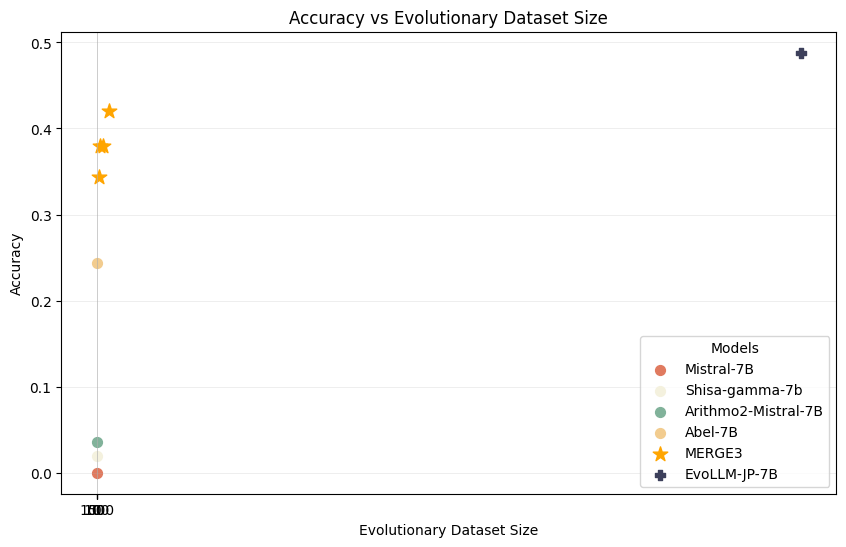

In [6]:
# Define colors for each model
color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
}

colors = {
    "Mistral-7B": color_dict["Burnt sienna"],
    "Shisa-gamma-7b": color_dict["Eggshell"],
    "Arithmo2-Mistral-7B": color_dict["Cambridge blue"],
    "Abel-7B": color_dict["Sunset"],
    "MERGE3": "orange",
    "EvoLLM-JP-7B": color_dict["Delft Blue"]
}

# Plot the data with different markers and colors
plt.figure(figsize=(10, 6))
for bin_label in df['bin'].unique():
    subset = df[df['bin'] == bin_label]
    if bin_label == 'MERGE3':
        s = 120
    else:
        s = 50
    plt.scatter(subset['dataset_size'], subset['accuracy'], label=bin_label, marker=markers[bin_label], color=colors[bin_label], s=s)



# Add labels and legend
plt.ylabel("Accuracy")
plt.xlabel("Evolutionary Dataset Size")
plt.title("Accuracy vs Evolutionary Dataset Size")
plt.xticks([0, 50, 100, 1000])
#plt.yticks([0, 0.25, 0.5])
plt.legend(title="Models")
plt.grid(True, linewidth=0.5, alpha=0.3)
plt.show()

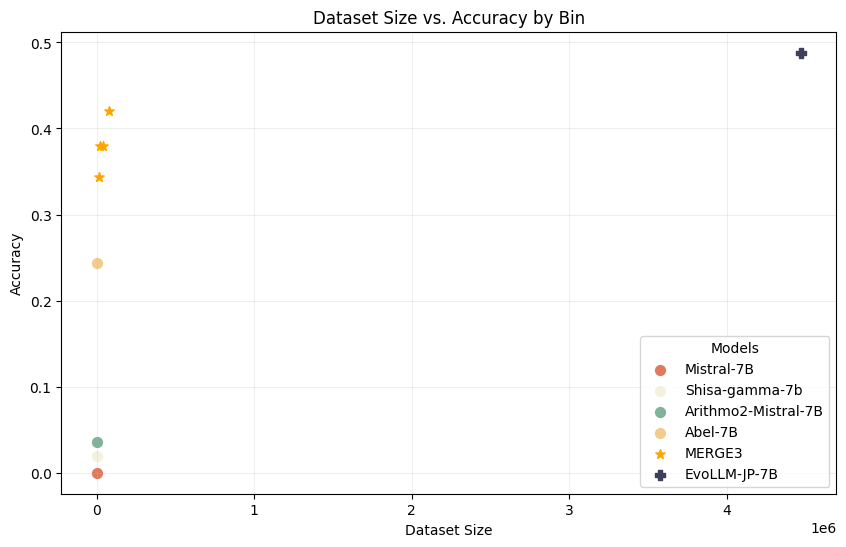

In [11]:
# Plot the data with different markers and colors
plt.figure(figsize=(10, 6))
for bin_label in df['bin'].unique():
    subset = df[df['bin'] == bin_label]
    plt.scatter(subset['dataset_size'], subset['accuracy'], label=bin_label, marker=markers[bin_label], color=colors[bin_label], s=50)

# Add labels and legend
plt.ylabel("Accuracy")
plt.xlabel("Dataset Size")
plt.title("Dataset Size vs. Accuracy by Bin")
#plt.xscale('log')
#plt.xticks([0, 50, 100, 1000])
plt.legend(title="Models")

# Make the grid less thick and more transparent
plt.grid(True, linewidth=0.5, alpha=0.3)

plt.show()